In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
dim_date = pd.read_csv('./datasets/dim_date.csv')
makers = pd.read_csv('./datasets/electric_vehicle_sales_by_makers.csv')
states = pd.read_csv('./datasets/electric_vehicle_sales_by_state.csv')
makers_2_wheelers = pd.read_csv('./datasets/makers_2_wheelers.csv')
makers_4_wheelers = pd.read_csv('./datasets/makers_4_wheelers.csv')
states_2_wheelers = pd.read_csv('./datasets/state_2_wheelers.csv')
states_4_wheelers = pd.read_csv('./datasets/state_4_wheelers.csv')

### 1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [85]:
# Merging the 'dim_date' and 'makers_2_wheelers' data
makers_2_wheelers_dim_date_merged = pd.merge(makers_2_wheelers, dim_date, on='date', how='left')

In [86]:
# Grouping by 'fiscal year' and 'maker' to find the number of electric vehicles sold
grouped_data_1 = makers_2_wheelers_dim_date_merged.groupby(['fiscal_year', 'maker']).agg({'electric_vehicles_sold': 'sum'}).reset_index()

def get_top_3(df, n=3):
    top_3 = df.nlargest(n, 'electric_vehicles_sold')
    return pd.concat([top_3])

def get_bottom_3(df, n=3):
    bottom_3 = df.nsmallest(n, 'electric_vehicles_sold')
    return pd.concat([bottom_3])

In [87]:
list_top_3 = grouped_data_1.groupby('fiscal_year').apply(get_top_3).reset_index(drop=True)
list_bottom_3 = grouped_data_1.groupby('fiscal_year').apply(get_bottom_3).reset_index(drop=True)

list_top_3_fy_2023 = list_top_3[list_top_3['fiscal_year'] == 2023].reset_index(drop=True)
list_top_3_fy_2024 = list_top_3[list_top_3['fiscal_year'] == 2024].reset_index(drop=True)
list_bottom_3_fy_2023 = list_bottom_3[list_bottom_3['fiscal_year'] == 2023].reset_index(drop=True)
list_bottom_3_fy_2024 = list_bottom_3[list_bottom_3['fiscal_year'] == 2024].reset_index(drop=True)

print(f'Top-3 2-wheeler makers for FY-2023: \n{list_top_3_fy_2023}\n')
print(f'Top-3 2-wheeler makers for FY-2024: \n{list_top_3_fy_2024}\n')
print(f'Bottom-3 2-wheeler makers for FY-2023: \n{list_bottom_3_fy_2023}\n')
print(f'Bottom-3 2-wheeler makers for FY-2024: \n{list_bottom_3_fy_2024}\n')

Top-3 2-wheeler makers for FY-2023: 
   fiscal_year          maker  electric_vehicles_sold
0         2023   OLA ELECTRIC                  152583
1         2023        OKINAWA                   96945
2         2023  HERO ELECTRIC                   88993

Top-3 2-wheeler makers for FY-2024: 
   fiscal_year         maker  electric_vehicles_sold
0         2024  OLA ELECTRIC                  322489
1         2024           TVS                  180743
2         2024         ATHER                  107552

Bottom-3 2-wheeler makers for FY-2023: 
   fiscal_year     maker  electric_vehicles_sold
0         2023  JITENDRA                    8563
1         2023     BEING                   11018
2         2023   PURE EV                   11556

Bottom-3 2-wheeler makers for FY-2024: 
   fiscal_year            maker  electric_vehicles_sold
0         2024  BATTRE ELECTRIC                    4841
1         2024           REVOLT                    7254
2         2024    KINETIC GREEN                    

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_14432\756609993.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  list_top_3 = grouped_data_1.groupby('fiscal_year').apply(get_top_3).reset_index(drop=True)
C:\Users\DHRUV\AppData\Local\Temp\ipykernel_14432\756609993.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  list_bottom_3 = grouped_data_1.groupby('fiscal_year').apply(get_bottom_3).reset_index(drop=True

### 2. Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

In [88]:
# Merging above data with dim_date data
states_2_wheelers_dim_date_merged = pd.merge(states_2_wheelers, dim_date, on='date', how='left')
states_4_wheelers_dim_date_merged = pd.merge(states_4_wheelers, dim_date, on='date', how='left')

In [89]:
# Filtering the data for FY 2024
states_2_wheelers_dim_date_merged_fy_2024 = states_2_wheelers_dim_date_merged[states_2_wheelers_dim_date_merged['fiscal_year'] == 2024]
states_4_wheelers_dim_date_merged_fy_2024 = states_4_wheelers_dim_date_merged[states_4_wheelers_dim_date_merged['fiscal_year'] == 2024]

In [90]:
# Calculating penetration rate for each state and filtering for top-5 states
states_2_wheelers_dim_date_merged_fy_2024['penetration_rate'] = (states_2_wheelers_dim_date_merged_fy_2024['electric_vehicles_sold'] / states_2_wheelers_dim_date_merged_fy_2024['total_vehicles_sold']) * 100
states_4_wheelers_dim_date_merged_fy_2024['penetration_rate'] = (states_4_wheelers_dim_date_merged_fy_2024['electric_vehicles_sold'] / states_4_wheelers_dim_date_merged_fy_2024['total_vehicles_sold']) * 100

def get_top_5_states_pr(df):
    statewise_pr = df.groupby('state').agg({'penetration_rate': 'mean'}).reset_index()
    top_5_states = statewise_pr.nlargest(5, 'penetration_rate')
    return top_5_states

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_14432\3948915738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_2_wheelers_dim_date_merged_fy_2024['penetration_rate'] = (states_2_wheelers_dim_date_merged_fy_2024['electric_vehicles_sold'] / states_2_wheelers_dim_date_merged_fy_2024['total_vehicles_sold']) * 100
C:\Users\DHRUV\AppData\Local\Temp\ipykernel_14432\3948915738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_4_wheelers_dim_date_merged_fy_2024['penetration_rate'] = (states_4_wheel

In [91]:
top_5_states_2_wheelers_pr = get_top_5_states_pr(states_2_wheelers_dim_date_merged_fy_2024)
top_5_states_4_wheelers_pr = get_top_5_states_pr(states_4_wheelers_dim_date_merged_fy_2024)

print(f'Top-5 states in terms of PENETRATION RATE of 2-wheelers EV for FY 2024: \n{top_5_states_2_wheelers_pr}\n')
print(f'Top-5 states in terms of PENETRATION RATE of 4-wheelers EV for FY 2024: \n{top_5_states_4_wheelers_pr}')

Top-5 states in terms of PENETRATION RATE of 2-wheelers EV for FY 2024: 
          state  penetration_rate
10          Goa         18.184784
17       Kerala         13.610393
16    Karnataka         11.510878
20  Maharashtra         10.157240
9         Delhi          9.700033

Top-5 states in terms of PENETRATION RATE of 4-wheelers EV for FY 2024: 
         state  penetration_rate
17      Kerala         42.309117
6   Chandigarh          4.914759
10         Goa          4.369512
16   Karnataka          4.277313
9        Delhi          4.263585


### 3. List the states with negative penetration (decline) in EV sales from 2022 to 2024.

In [92]:
# Merging the state sales data with dim_date data
states_dim_date_merged = pd.merge(states, dim_date, on='date', how='left')

In [93]:
states_dim_date_merged

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,2022,Q1
...,...,...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,2024,Q4
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,2024,Q4
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,2024,Q4
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4


In [94]:
# Calculating penetration rate for each state
states_dim_date_merged_pr = states_dim_date_merged[['date','state','vehicle_category','electric_vehicles_sold','total_vehicles_sold','fiscal_year','quarter']]
states_dim_date_merged_pr['penetration_rate'] = (states_dim_date_merged_pr['electric_vehicles_sold'] / states_dim_date_merged_pr['total_vehicles_sold']) * 100

# Getting states with Negative PR
def negative_pr_states(df):
    statewise_pr = df.groupby(['state', 'fiscal_year']).agg({'penetration_rate': 'mean'}).reset_index()
    statewise_pr_pivot = statewise_pr.pivot(index='state', columns='fiscal_year', values='penetration_rate').reset_index()
    statewise_pr_pivot['penetration_change'] = statewise_pr_pivot[2024] - statewise_pr_pivot[2022]
    negative_states = statewise_pr_pivot[statewise_pr_pivot['penetration_change'] < 0]
    negative_states.columns.name = None
    return negative_states[['state', 'penetration_change']]

In [95]:
list_negative_pr_states = negative_pr_states(states_dim_date_merged_pr)

print(f'States with NEGATIVE PR from 2022 to 2024: \n{list_negative_pr_states}')

States with NEGATIVE PR from 2022 to 2024: 
                       state  penetration_change
1   Andaman & Nicobar Island           -0.055968
18                    Ladakh           -0.624317


### 4. What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

In [96]:
# Merging 4 wheeler makers data with dim date data
makers_4_wheelers_dim_date_merged = pd.merge(makers_4_wheelers, dim_date, on='date', how='left')

In [97]:
# Filtering Top-5 makers based on their sales
top_5_makers_4_wheelers = makers_4_wheelers_dim_date_merged.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index
top_5_makers_sales_4_wheelers = makers_4_wheelers_dim_date_merged[makers_4_wheelers_dim_date_merged['maker'].isin(top_5_makers_4_wheelers)]

# Calculating total sales volume for each quarter
top_5_makers_4_wheelers_quarterly_sales = top_5_makers_sales_4_wheelers.groupby(['maker', 'fiscal_year', 'quarter']).agg({'electric_vehicles_sold': 'sum'}).reset_index()

In [98]:
# Creating a column combining fiscal year and quarter
top_5_makers_4_wheelers_quarterly_sales['fiscal_quarter'] = top_5_makers_4_wheelers_quarterly_sales['fiscal_year'].astype(str) + '-' + top_5_makers_4_wheelers_quarterly_sales['quarter'].astype(str)

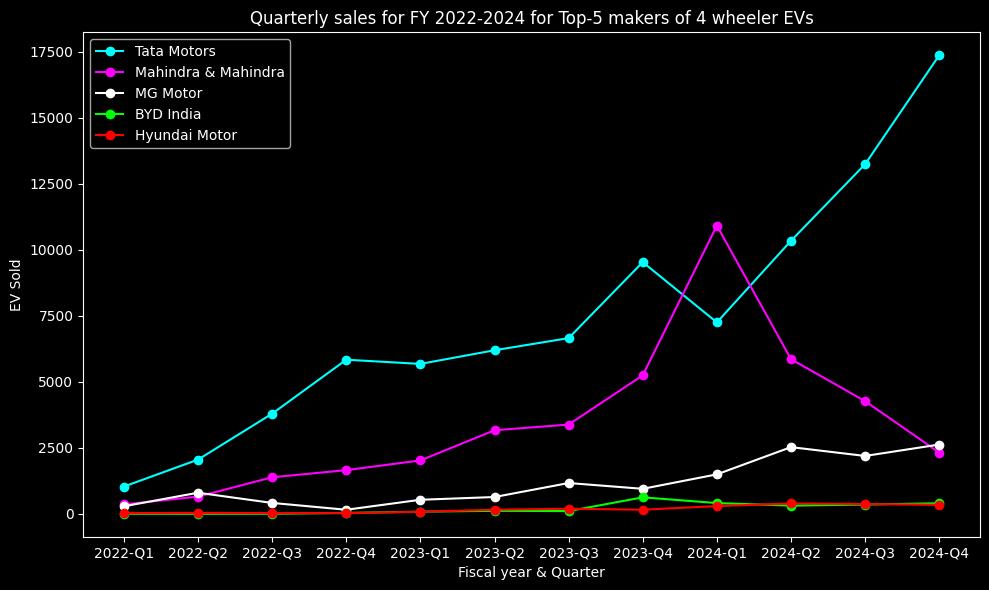

In [99]:
plt.style.use('dark_background')
colors = ['cyan', 'magenta', 'white', 'lime', 'red']

plt.figure(figsize=(10,6))
for i, maker in enumerate(top_5_makers_4_wheelers):
    makers_data = top_5_makers_4_wheelers_quarterly_sales[top_5_makers_4_wheelers_quarterly_sales['maker'] == maker]
    plt.plot(makers_data['fiscal_quarter'], makers_data['electric_vehicles_sold'], marker='o', label=maker, color=colors[i])

plt.title('Quarterly sales for FY 2022-2024 for Top-5 makers of 4 wheeler EVs')
plt.xlabel('Fiscal year & Quarter')
plt.ylabel('EV Sold')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

### 5. How do the EV SALES and PENETRATION RATE in Delhi compare to Karnataka for 2024?

In [100]:
# Filtering data for 2024 fiscal year
states_dim_date_merged_fy_2024 = states_dim_date_merged[states_dim_date_merged['fiscal_year'] == 2024]

In [101]:
# Filtering Delhi and Karnataka state data
delhi_data = states_dim_date_merged_fy_2024[states_dim_date_merged_fy_2024['state'] == 'Delhi']
karnataka_data = states_dim_date_merged_fy_2024[states_dim_date_merged_fy_2024['state'] == 'Karnataka']

In [102]:
# Calculating EV sales for Delhi and Karnataka
delhi_ev_sales = delhi_data['electric_vehicles_sold'].sum()
karnataka_ev_sales = karnataka_data['electric_vehicles_sold'].sum()

In [103]:
# Calculating PR for Delhi and Karnataka
delhi_data['penetration_rate'] = (delhi_data['electric_vehicles_sold'] / delhi_data['total_vehicles_sold']) * 100
karnataka_data['penetration_rate'] = (karnataka_data['electric_vehicles_sold'] / karnataka_data['total_vehicles_sold']) * 100

delhi_pr = delhi_data['penetration_rate'].mean()
karnataka_pr = karnataka_data['penetration_rate'].mean()

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_14432\900618566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['penetration_rate'] = (delhi_data['electric_vehicles_sold'] / delhi_data['total_vehicles_sold']) * 100
C:\Users\DHRUV\AppData\Local\Temp\ipykernel_14432\900618566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karnataka_data['penetration_rate'] = (karnataka_data['electric_vehicles_sold'] / karnataka_data['total_vehicles_sold']) * 100


In [104]:
print(f"EV Sales in 2024:")
print(f"        Delhi: {delhi_ev_sales} vehicles")
print(f"        Karnataka: {karnataka_ev_sales} vehicles\n")

print(f"Penetration Rate in 2024:")
print(f"        Delhi: {delhi_pr} %")
print(f"        Karnataka: {karnataka_pr} %")

EV Sales in 2024:
        Delhi: 46724 vehicles
        Karnataka: 160989 vehicles

Penetration Rate in 2024:
        Delhi: 6.981809210179787 %
        Karnataka: 7.894095232453324 %


### 6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [105]:
annual_sales = top_5_makers_4_wheelers_quarterly_sales.groupby(['maker', 'fiscal_year']).agg({'electric_vehicles_sold': 'sum'}).reset_index()

In [106]:
cagr_results = []

for maker in annual_sales['maker'].unique():
    maker_data = annual_sales[annual_sales['maker'] == maker]

    # Sales for 2022-2024
    annual_sales_2022 = maker_data[maker_data['fiscal_year'] == 2022]['electric_vehicles_sold'].values[0]
    annual_sales_2024 = maker_data[maker_data['fiscal_year'] == 2024]['electric_vehicles_sold'].values[0]

    # Calculating CAGR
    cagr = ((annual_sales_2024 / annual_sales_2022) ** (1/2)) - 1 # 1/2 bcs there are 2 years between 2022 and 2024
    cagr_results.append({'maker':maker, 'CAGR_2022_2024': cagr})

In [107]:
cagr_results = pd.DataFrame(cagr_results)
print(cagr_results)

                 maker  CAGR_2022_2024
0            BYD India        5.665151
1        Hyundai Motor        2.554766
2             MG Motor        1.315309
3  Mahindra & Mahindra        1.403301
4          Tata Motors        0.947150


### 7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [108]:
statewise_total_annual_sales = states_dim_date_merged.groupby(['state', 'fiscal_year']).agg({'total_vehicles_sold': 'sum'}).reset_index()

statewise_total_annual_sales

,state,fiscal_year,total_vehicles_sold
0,Andaman & Nicobar,2024,660
1,Andaman & Nicobar Island,2022,5148
2,Andaman & Nicobar Island,2023,6534
3,Andaman & Nicobar Island,2024,6543
4,Andhra Pradesh,2022,772748
...,...,...,...
98,Uttarakhand,2023,216265
99,Uttarakhand,2024,233111
100,West Bengal,2022,860709
101,West Bengal,2023,913558


In [109]:
def calculate_cagr(start_value, end_value):
    if start_value == 0:
        return np.nan
    return ((end_value / start_value)**(1/2)) - 1

# Pivot the data to have fiscal years as columns
state_sales_pivot = statewise_total_annual_sales.pivot(index='state', columns='fiscal_year', values='total_vehicles_sold').reset_index()

# Calculate CAGR for the period from 2022 to 2024
state_sales_pivot['CAGR_2022_2024'] = state_sales_pivot.apply(
    lambda row: calculate_cagr(row[2022], row[2024]) if pd.notnull(row[2022]) and pd.notnull(row[2024]) else np.nan,
    axis=1
)

# Sort the states by CAGR in descending order and select the top 10
top_10_states_cagr = state_sales_pivot[['state', 'CAGR_2022_2024']].sort_values(by='CAGR_2022_2024', ascending=False).head(10)

In [110]:
print(f'Top-10 states with highest CAGR from 2022-2024 for total vehicles sold: \n{top_10_states_cagr.to_string(index=False)}')

Top-10 states with highest CAGR from 2022-2024 for total vehicles sold: 
            state  CAGR_2022_2024
        Meghalaya        0.284691
              Goa        0.274102
        Karnataka        0.252836
            Delhi        0.228843
        Rajasthan        0.214974
          Gujarat        0.205457
            Assam        0.201337
          Mizoram        0.187716
Arunachal Pradesh        0.183034
          Haryana        0.176804


### 8. What are the peak and low season months for EV sales based on the data from 2022 to 2024? 

In [111]:
# states_dim_date_merged_ev_sales = states_dim_date_merged[['date','state','vehicle_category','electric_vehicles_sold','total_vehicles_sold','quarter','fiscal_year']]

# states_dim_date_merged_ev_sales = states_dim_date_merged_ev_sales[states_dim_date_merged_ev_sales['fiscal_year'].isin([2022,2023,2024])]

# states_dim_date_merged_ev_sales['date'] = pd.to_datetime(states_dim_date_merged_ev_sales['date'], format ='%d-%b-%y')
# states_dim_date_merged_ev_sales['month_name'] = states_dim_date_merged_ev_sales['date'].dt.strftime('%B')

# states_dim_date_merged_ev_sales

ev_sales_combined = pd.concat([states, makers])
ev_sales_combined = pd.merge(ev_sales_combined, dim_date, on='date', how='left')

ev_sales_combined['date'] = pd.to_datetime(ev_sales_combined['date'], format='%d-%b-%y')
ev_sales_combined['month_name'] = ev_sales_combined['date'].dt.strftime('%B')

ev_sales_combined

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,maker,fiscal_year,quarter,month_name
0,2021-04-01,Sikkim,2-Wheelers,0,398.0,NaN,2022,Q1,April
1,2021-04-01,Sikkim,4-Wheelers,0,361.0,NaN,2022,Q1,April
2,2021-05-01,Sikkim,2-Wheelers,0,113.0,NaN,2022,Q1,May
3,2021-05-01,Sikkim,4-Wheelers,0,98.0,NaN,2022,Q1,May
4,2021-06-01,Sikkim,2-Wheelers,0,229.0,NaN,2022,Q1,June
...,...,...,...,...,...,...,...,...,...
3256,2024-03-01,NaN,2-Wheelers,3070,NaN,BGAUSS,2024,Q4,March
3257,2024-03-01,NaN,2-Wheelers,625,NaN,BATTRE ELECTRIC,2024,Q4,March
3258,2024-03-01,NaN,2-Wheelers,3915,NaN,KINETIC GREEN,2024,Q4,March
3259,2024-03-01,NaN,2-Wheelers,585,NaN,REVOLT,2024,Q4,March


In [112]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

monthly_ev_sales = ev_sales_combined.groupby('month_name').agg({'electric_vehicles_sold': 'sum'}).reset_index()
monthly_ev_sales['month_name'] = pd.Categorical(monthly_ev_sales['month_name'], categories=months_order, ordered=True)
monthly_ev_sales['electric_vehicles_sold'] = (monthly_ev_sales['electric_vehicles_sold'] / 2).astype(int)
# monthly_ev_sales
monthly_ev_sales_sorted = monthly_ev_sales.sort_values(by='electric_vehicles_sold', ascending=False)
monthly_ev_sales_sorted = monthly_ev_sales.sort_values(by='month_name')

In [113]:
monthly_ev_sales_sorted

,month_name,electric_vehicles_sold
4,January,189099
3,February,198049
7,March,291587
0,April,134657
8,May,159869
6,June,106709
5,July,127426
1,August,141961
11,September,145972
10,October,185185


In [114]:
# Determining Peak and Low season sales
peak_month = monthly_ev_sales.iloc[monthly_ev_sales['electric_vehicles_sold'].idxmax()]
low_month = monthly_ev_sales.iloc[monthly_ev_sales['electric_vehicles_sold'].idxmin()]

print(f'Peak sales month: {peak_month['month_name']} -> {peak_month['electric_vehicles_sold']} EVs sold')
print(f'Low sales month: {low_month['month_name']} -> {low_month['electric_vehicles_sold']} EVs sold')

print(f'\n Month-wise Sales (Sorted High to Low): \n {monthly_ev_sales_sorted}')

Peak sales month: March -> 291587 EVs sold
Low sales month: June -> 106709 EVs sold

 Month-wise Sales (Sorted High to Low): 
    month_name  electric_vehicles_sold
4     January                  189099
3    February                  198049
7       March                  291587
0       April                  134657
8         May                  159869
6        June                  106709
5        July                  127426
1      August                  141961
11  September                  145972
10    October                  185185
9    November                  205196
2    December                  180401


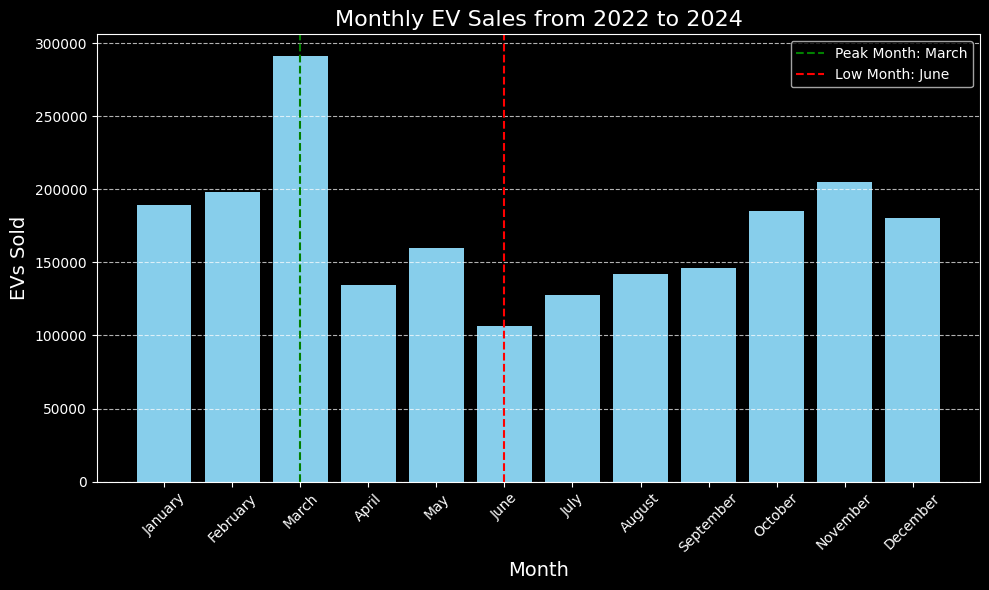

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_ev_sales_sorted['month_name'], monthly_ev_sales_sorted['electric_vehicles_sold'], color='skyblue')

plt.title('Monthly EV Sales from 2022 to 2024', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('EVs Sold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlighting the peak and low months
plt.axvline(x=peak_month['month_name'], color='green', linestyle='--', label=f'Peak Month: {peak_month["month_name"]}')
plt.axvline(x=low_month['month_name'], color='red', linestyle='--', label=f'Low Month: {low_month["month_name"]}')

plt.legend()
plt.tight_layout()
plt.show()

### 9. What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [116]:
states_dim_date_merged

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,2022,Q1
...,...,...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,2024,Q4
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,2024,Q4
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,2024,Q4
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4


In [117]:
# Calculate total sales of states
total_ev_sales = states_dim_date_merged.groupby(['state', 'fiscal_year'])['electric_vehicles_sold'].sum().reset_index()

# Calculate CAGR
def calculate_cagr_proj(start_value, end_value, periods):
    return (end_value/start_value)**(1/periods) - 1

cagr_list = []
for state in total_ev_sales['state'].unique():
    sales_2022 = total_ev_sales[(total_ev_sales['state'] == state) & (total_ev_sales['fiscal_year'] == 2022)]['electric_vehicles_sold'].sum()
    sales_2024 = total_ev_sales[(total_ev_sales['state'] == state) & (total_ev_sales['fiscal_year'] == 2024)]['electric_vehicles_sold'].sum()

    if sales_2022 > 0:
        cagr_value = calculate_cagr_proj(sales_2022, sales_2024, 2)
    else:
        cagr_value = 0
    cagr_list.append({'state':state, 'cagr':cagr})

cagr_df = pd.DataFrame(cagr_list)

In [118]:
# Identifying top 10 states by PR
states_penetration = states_dim_date_merged.groupby('state').agg({'electric_vehicles_sold':'sum', 'total_vehicles_sold':'sum'}).reset_index()
states_penetration['penetration_rate'] = states_penetration['electric_vehicles_sold'] / states_penetration['total_vehicles_sold']
top_10_states = states_penetration.sort_values(by='penetration_rate', ascending=False).head(10)
top_10_states

,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate
10,Goa,19684,199970,0.098435
16,Karnataka,312995,3994329,0.078360
9,Delhi,107312,1588436,0.067558
17,Kerala,137060,2064677,0.066383
20,Maharashtra,396045,6101429,0.064910
25,Odisha,78267,1688794,0.046345
28,Rajasthan,150366,3307591,0.045461
11,Gujarat,181389,4125551,0.043967
30,Tamil Nadu,200062,4652363,0.043002
6,Chandigarh,5279,130628,0.040412


In [119]:
projection_list = []
for state in top_10_states['state']:
    current_sales = total_ev_sales[(total_ev_sales['state'] == state) & (total_ev_sales['fiscal_year'] == 2024)]['electric_vehicles_sold'].sum()
    state_cagr = cagr_df[cagr_df['state'] == state]['cagr'].values[0]

    projected_sales_2030 = current_sales * ((1 + state_cagr) ** (2030 - 2024))
    projection_list.append({'state':state, 'projected_sales':int(projected_sales_2030)})

projection_df = pd.DataFrame(projection_list)
projection_df = projection_df.sort_values(by='projected_sales', ascending=False).reset_index(drop=True)
projection_df

,state,projected_sales
0,Maharashtra,10745693
1,Karnataka,8773886
2,Tamil Nadu,5140104
3,Gujarat,4597558
4,Kerala,4029614
5,Rajasthan,3621192
6,Delhi,2546453
7,Odisha,2131927
8,Goa,588544
9,Chandigarh,156796


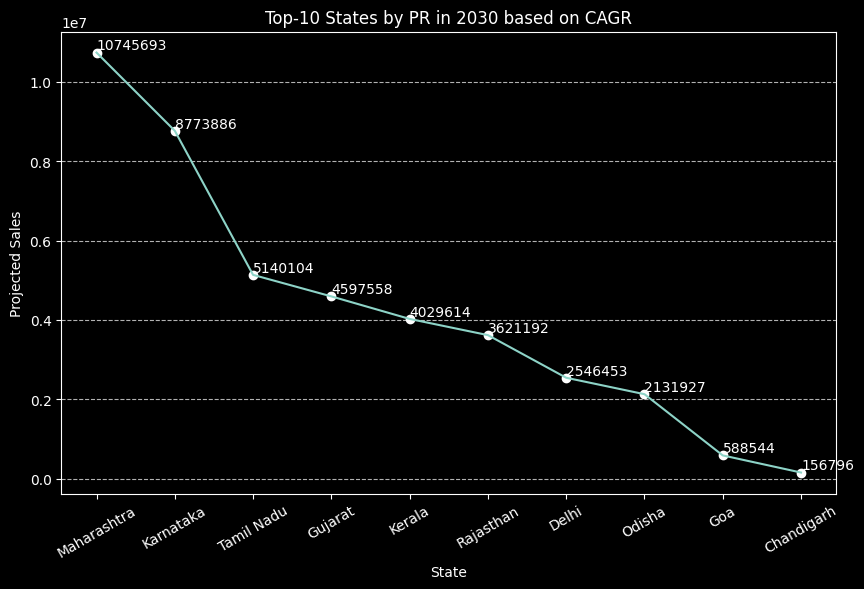

In [120]:
plt.figure(figsize=(10,6))
plt.plot(projection_df['state'], projection_df['projected_sales'])

for i, value in enumerate(projection_df['projected_sales']):
    plt.text(i, value + 100, f"{value}", va='bottom')
    plt.scatter(i, value + 100, marker='o', color='white')

plt.title('Top-10 States by PR in 2030 based on CAGR')
plt.xlabel('State')
plt.ylabel('Projected Sales')
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.show()

### 10. Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price.
|Vehicle Category|Average Price|
|:--------------:|:-----------:|
|2 wheelers|85,000|
|4 wheelers|15,00,000|

Growth Rate = ((End Value−Start Value) / Start Value)×100

In [121]:
# We will use states_2_wheelers_dim_date_merged and states_4_wheelers_dim_date_merged data

# Aggregating sales by fiscal year
sales_2_wheelers = states_2_wheelers_dim_date_merged.groupby('fiscal_year')['electric_vehicles_sold'].sum().reset_index()
sales_4_wheelers = states_4_wheelers_dim_date_merged.groupby('fiscal_year')['electric_vehicles_sold'].sum().reset_index()

In [122]:
# Calculating revenue for each fiscal year
avg_price_2wheeler = 85000
avg_price_4wheeler = 1500000

sales_2_wheelers['revenue'] = sales_2_wheelers['electric_vehicles_sold'] * avg_price_2wheeler
sales_4_wheelers['revenue'] = sales_4_wheelers['electric_vehicles_sold'] * avg_price_4wheeler

In [123]:
def calculate_growth_rate(start_value, end_value):
    return ((end_value - start_value) / start_value) * 100

# Growth rate for 2 wheeler
revenue_2wheelers_2022 = sales_2_wheelers[sales_2_wheelers['fiscal_year'] == 2022]['revenue'].values[0]
revenue_2wheelers_2023 = sales_2_wheelers[sales_2_wheelers['fiscal_year'] == 2023]['revenue'].values[0]
revenue_2wheelers_2024 = sales_2_wheelers[sales_2_wheelers['fiscal_year'] == 2024]['revenue'].values[0]

growth_rate_2wheelers_2022_2024 = calculate_growth_rate(revenue_2wheelers_2022, revenue_2wheelers_2024)
growth_rate_2wheelers_2023_2024 = calculate_growth_rate(revenue_2wheelers_2023, revenue_2wheelers_2024)

# Growth rate for 4 wheeler
revenue_4wheelers_2022 = sales_4_wheelers[sales_4_wheelers['fiscal_year'] == 2022]['revenue'].values[0]
revenue_4wheelers_2023 = sales_4_wheelers[sales_4_wheelers['fiscal_year'] == 2023]['revenue'].values[0]
revenue_4wheelers_2024 = sales_4_wheelers[sales_4_wheelers['fiscal_year'] == 2024]['revenue'].values[0]

growth_rate_4wheelers_2022_2024 = calculate_growth_rate(revenue_4wheelers_2022, revenue_4wheelers_2024)
growth_rate_4wheelers_2023_2024 = calculate_growth_rate(revenue_4wheelers_2023, revenue_4wheelers_2024)

print(f'Revenue Growth Rate for 2 wheelers (2022-2024): {growth_rate_2wheelers_2022_2024:.2f}%')
print(f'Revenue Growth Rate for 2 wheelers (2023-2024): {growth_rate_2wheelers_2023_2024:.2f}%')
print(f'Revenue Growth Rate for 4 wheelers (2022-2024): {growth_rate_4wheelers_2022_2024:.2f}%')
print(f'Revenue Growth Rate for 4 wheelers (2023-2024): {growth_rate_4wheelers_2023_2024:.2f}%')

Revenue Growth Rate for 2 wheelers (2022-2024): 269.28%
Revenue Growth Rate for 2 wheelers (2023-2024): 28.13%
Revenue Growth Rate for 4 wheelers (2022-2024): 367.79%
Revenue Growth Rate for 4 wheelers (2023-2024): 83.08%
